In [146]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [228]:
df = pd.read_csv("./data.csv")

df.head(5)

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [235]:
df.head(5)

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Smoking Rate,Respiratory Deaths,Hospitals,Health Spending,Med-Large Airports,Age 55+,Infected per Population,Deaths per Infected,Tested per Population,Infection level
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,21.0,35.3,21,11064,1.0,0.25,0.023238,0.004925,0.844916,2
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,20.9,58.0,101,7281,1.0,0.31,0.039704,0.015255,0.276334,2
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,22.3,61.7,88,7408,0.0,0.30,0.037394,0.017467,0.448644,2
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,15.6,41.2,83,6452,1.0,0.30,0.033630,0.024107,0.242950,2
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,11.3,30.9,359,7549,9.0,0.26,0.023302,0.018989,0.473553,2


In [234]:
df.drop(['Physicians','Temperature','School Closure Date','Income' , 'GDP', 'Pollution', 'Urban' , 'Flu Deaths' , 'Age 0-25', 'Age 26-54' , 'Sex Ratio' , 'Unemployment'],axis=1,inplace=True)

In [164]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    51 non-null     object 
 1   Tested                   51 non-null     int64  
 2   Infected                 51 non-null     int64  
 3   Deaths                   51 non-null     int64  
 4   Population               51 non-null     int64  
 5   Pop Density              51 non-null     float64
 6   Gini                     51 non-null     float64
 7   ICU Beds                 51 non-null     int64  
 8   Smoking Rate             51 non-null     float64
 9   Respiratory Deaths       51 non-null     float64
 10  Hospitals                51 non-null     int64  
 11  Health Spending          51 non-null     int64  
 12  Med-Large Airports       51 non-null     float64
 13  Age 55+                  51 non-null     float64
 14  Infected per Population  51 

NoneType

In [232]:
conditionlist = [
    (df['Infected per Population'] >= 0.04) ,
    (df['Infected per Population'] >= 0.02) & (df['Infected per Population'] <0.04),
    (df['Infected per Population'] <= 0.02)]
choicelist = [3,2,1]
df['Infection level'] = np.select(conditionlist, choicelist, default='Not Specified')

In [233]:
df['Infection level'] = pd.to_numeric(df['Infection level'])

In [229]:
df['Infected per Population'] = df['Infected'] / df['Population']

In [230]:
df['Deaths per Infected'] = df['Deaths'] / df['Infected']

In [231]:
df['Tested per Population'] = df['Tested'] / df['Population']

In [236]:
df.isnull().sum()

State                      0
Tested                     0
Infected                   0
Deaths                     0
Population                 0
Pop Density                0
Gini                       0
ICU Beds                   0
Smoking Rate               0
Respiratory Deaths         0
Hospitals                  0
Health Spending            0
Med-Large Airports         0
Age 55+                    0
Infected per Population    0
Deaths per Infected        0
Tested per Population      0
Infection level            0
dtype: int64

In [237]:
df_des = df.describe()

df_des.drop(['Gini','Age 55+','Health Spending', 'Hospitals'], axis = 1, inplace = True)

In [238]:
df_des

,Tested,Infected,Deaths,Population,Pop Density,ICU Beds,Smoking Rate,Respiratory Deaths,Med-Large Airports,Infected per Population,Deaths per Infected,Tested per Population,Infection level
count,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2.904946e+06,179626.666667,4357.745098,6.496451e+06,431.560508,1466.411765,17.270588,42.335294,1.215686,0.027907,0.022859,0.474025,1.901961
std,3.590449e+06,208077.881595,5637.548491,7.450657e+06,1647.225920,1562.124594,3.489429,10.908416,1.758564,0.011170,0.014442,0.205804,0.538699
min,1.340180e+05,2219.000000,58.000000,5.670250e+05,1.286300,94.000000,8.900000,19.600000,0.000000,0.003533,0.004925,0.198946,1.000000
25%,8.216280e+05,46623.500000,650.500000,1.802113e+06,50.604850,327.000000,14.750000,34.800000,0.000000,0.021895,0.013858,0.327758,2.000000
50%,1.792602e+06,120865.000000,2113.000000,4.499692e+06,108.049700,1134.000000,17.100000,42.600000,1.000000,0.026967,0.019903,0.446828,2.000000
75%,3.403572e+06,208161.000000,4983.500000,7.587794e+06,223.983100,1841.500000,19.300000,48.350000,1.000000,0.034991,0.026919,0.566354,2.000000
max,1.891250e+07,930628.000000,25838.000000,3.993749e+07,11814.541000,7338.000000,26.000000,64.300000,9.000000,0.060409,0.067872,1.114270,3.000000


In [239]:
df.corr()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Smoking Rate,Respiratory Deaths,Hospitals,Health Spending,Med-Large Airports,Age 55+,Infected per Population,Deaths per Infected,Tested per Population,Infection level
Tested,1.000000,0.877429,0.887963,0.917761,-0.046610,0.446967,0.886886,-0.282789,-0.286646,0.700749,-0.053409,0.843630,-0.162257,-0.000316,0.280548,0.128576,0.074503
Infected,0.877429,1.000000,0.844120,0.957623,-0.087721,0.389080,0.962232,-0.186406,-0.151578,0.882612,-0.274788,0.902711,-0.238493,0.154888,0.085437,-0.097435,0.140375
Deaths,0.887963,0.844120,1.000000,0.842214,-0.023913,0.522758,0.840416,-0.242660,-0.304483,0.692202,-0.037318,0.725564,-0.122063,0.034433,0.490012,0.069110,0.087896
Population,0.917761,0.957623,0.842214,1.000000,-0.082282,0.380073,0.978022,-0.237066,-0.213398,0.873197,-0.219486,0.927649,-0.225115,-0.020490,0.155006,-0.116099,-0.007051
Pop Density,-0.046610,-0.087721,-0.023913,-0.082282,1.000000,0.506948,-0.079125,-0.174545,-0.368117,-0.152769,0.460614,-0.077283,-0.337299,-0.066183,0.263772,0.248199,0.024986
Gini,0.446967,0.389080,0.522758,0.380073,0.506948,1.000000,0.414981,0.075545,-0.113053,0.291098,0.123952,0.272112,-0.053329,0.065630,0.497396,0.168824,0.163075
ICU Beds,0.886886,0.962232,0.840416,0.978022,-0.079125,0.414981,1.000000,-0.117508,-0.123097,0.889141,-0.235379,0.916280,-0.194005,0.018565,0.145355,-0.131687,-0.010836
Smoking Rate,-0.282789,-0.186406,-0.242660,-0.237066,-0.174545,0.075545,-0.117508,1.000000,0.782544,-0.007701,-0.003635,-0.258708,0.226318,0.179333,-0.250253,-0.120419,0.145263
Respiratory Deaths,-0.286646,-0.151578,-0.304483,-0.213398,-0.368117,-0.113053,-0.123097,0.782544,1.000000,0.022939,-0.347737,-0.270746,0.192187,0.197148,-0.418592,-0.391315,0.077859
Hospitals,0.700749,0.882612,0.692202,0.873197,-0.152769,0.291098,0.889141,-0.007701,0.022939,1.000000,-0.309285,0.780766,-0.285667,0.123307,-0.013452,-0.249982,0.086301


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    51 non-null     object 
 1   Tested                   51 non-null     int64  
 2   Infected                 51 non-null     int64  
 3   Deaths                   51 non-null     int64  
 4   Population               51 non-null     int64  
 5   Pop Density              51 non-null     float64
 6   Gini                     51 non-null     float64
 7   ICU Beds                 51 non-null     int64  
 8   Smoking Rate             51 non-null     float64
 9   Respiratory Deaths       51 non-null     float64
 10  Hospitals                51 non-null     int64  
 11  Health Spending          51 non-null     int64  
 12  Med-Large Airports       51 non-null     float64
 13  Age 55+                  51 non-null     float64
 14  Infected per Population  51 

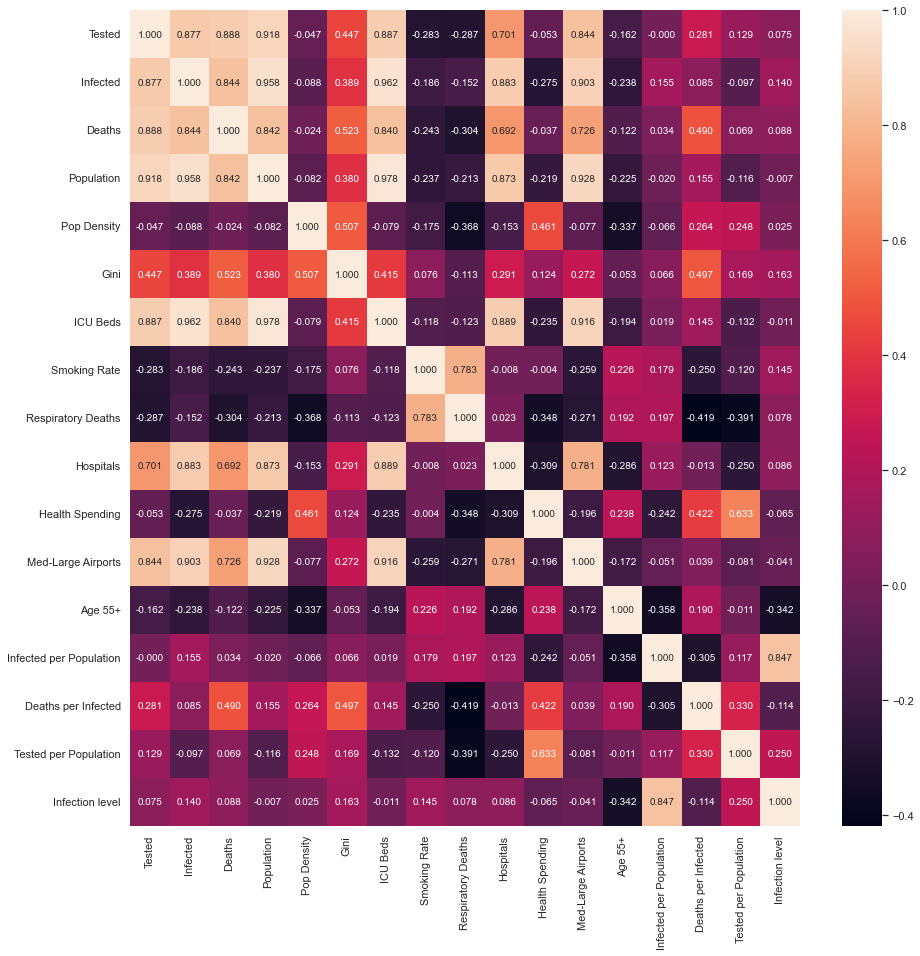

In [170]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.3f')
#sns.heatmap(df.corr())
plt.show()

In [246]:
print(pd.DataFrame(df.isnull().sum()).to_html(classes='table table-striped'))

<table border="1" class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>State</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Tested</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Infected</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Deaths</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Population</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Pop Density</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Gini</th>
      <td>0</td>
    </tr>
    <tr>
      <th>ICU Beds</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Smoking Rate</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Respiratory Deaths</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Hospitals</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Health Spending</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Med-Large Airports</th>
      <td>0</td>
    </tr>
    <tr>
      <th>Age 55+<

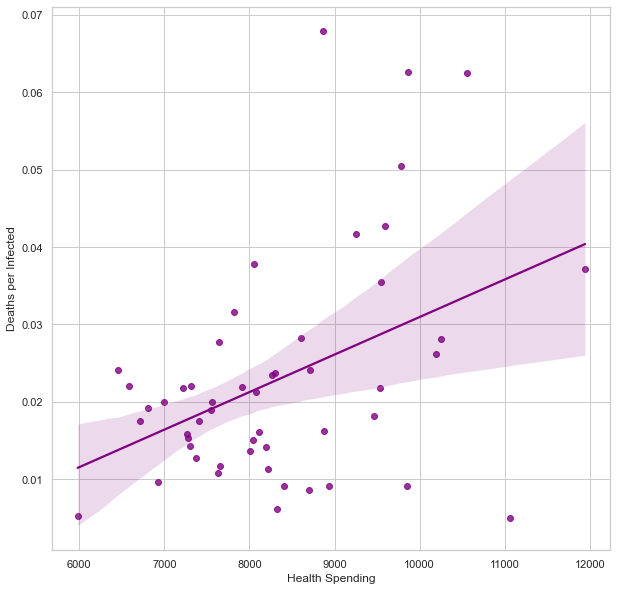

In [192]:
plt.figure(figsize=(10,10))
sns.regplot(x=df['Health Spending'],y = df['Deaths per Infected'], color='purple')
plt.show()

In [114]:
df[['Hospitals','Tested']].groupby(by=df['Infection level'])


,Hospitals,Tested
Infection level,,
1,199,4564903
2,523,18912501
3,158,3327915


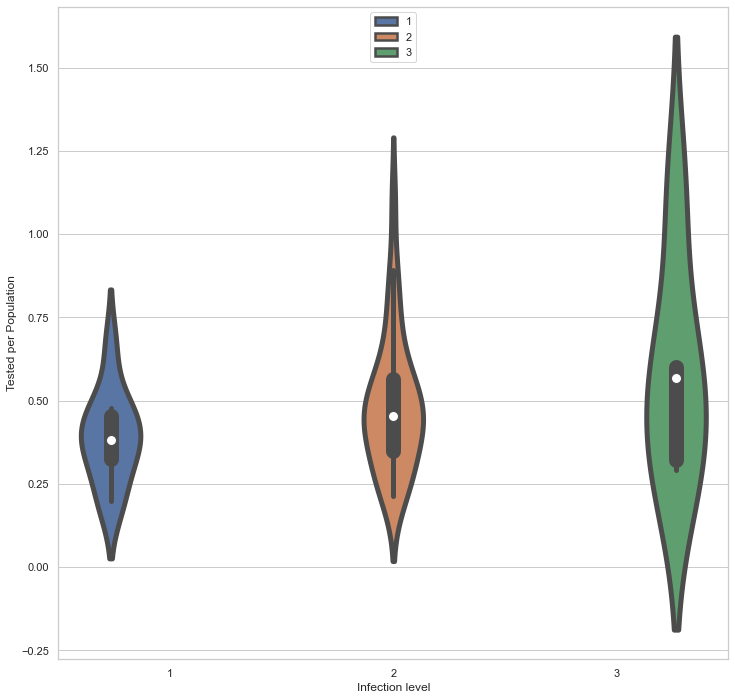

In [227]:
plt.figure(figsize=(12,12))
sns.set(style="whitegrid")
sns.violinplot(x="Infection level" , y="Tested per Population" , data=df ,hue='Infection level' , linewidth=5)
plt.legend(loc='upper center')
plt.show()

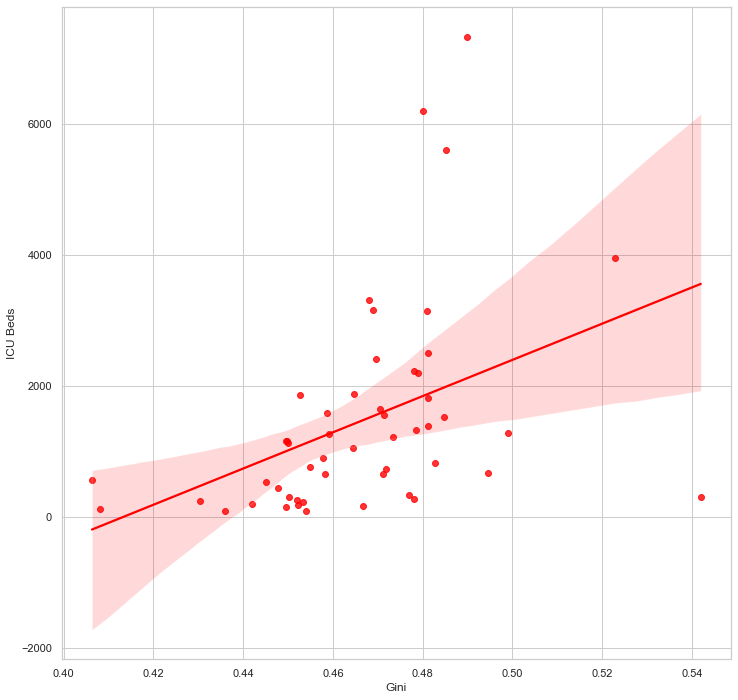

In [199]:
plt.figure(figsize=(12,12))
sns.regplot(x=df["Gini"], y=df["ICU Beds"] , color = 'red')
plt.show()

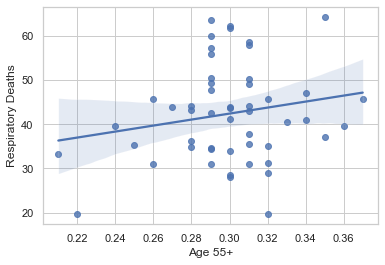

In [175]:
sns.regplot(x=df['Age 55+'], y=df['Respiratory Deaths'])
plt.show()

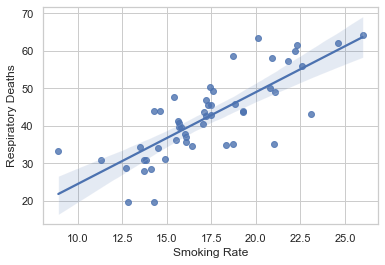

In [176]:
sns.regplot(x=df['Smoking Rate'], y=df['Respiratory Deaths'])
plt.show()

In [ ]:
sns.jointplot(x=df["Age 55+"], y=df["Deaths per Infection"], kind='hex')
plt.show()

In [ ]:
df.sort_values(by='Age 55+' , ascending=False)

In [ ]:
sns.regplot(x=df["Tested ratio"], y=df["Deaths"])

In [ ]:
sns.violinplot(x = y=df["sepal_length"])

In [194]:
df_sort = df.sort_values(by='Population')

In [195]:
my_range=range(1,len(df_sort.index)+1)

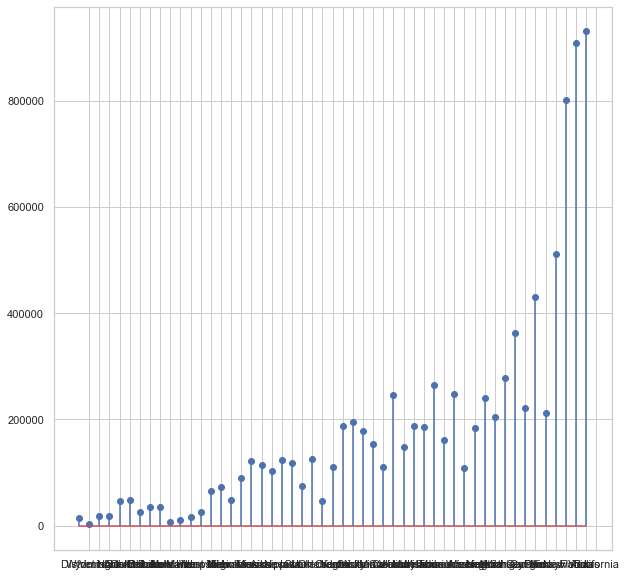

In [198]:
plt.figure(figsize=(10,10))
plt.stem(df_sort['Infected'])
plt.xticks(my_range,df_sort['State'])
plt.show()

<Figure size 720x720 with 0 Axes>

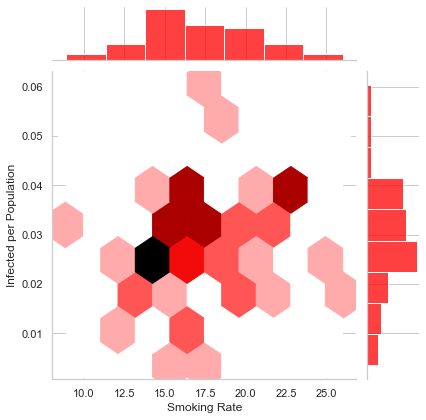

In [216]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df["Smoking Rate"], y=df["Infected per Population"], kind='hex', color='red')
plt.show()